# Premier League 2019-2020 Analysis

## by frankimi

https://raw.githubusercontent.com/openfootball/england/master/2019-20/1-premierleague.txt

In [546]:
# imports

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [547]:

# open online txt file and read data

target_url='https://raw.githubusercontent.com/openfootball/england/master/2019-20/1-premierleague.txt'
r = requests.get(target_url)
data = r.text
data = str(data).split('\n')
data = data[3:]

In [548]:
# Sample data

data[:35]

['Matchday 1',
 '[Fri Aug/9]',
 '  FC Liverpool            4-1 Norwich City',
 '[Sat Aug/10]',
 '  West Ham United         0-5 Manchester City',
 '  Crystal Palace          0-0 FC Everton',
 '  FC Watford              0-3 Brighton & Hove Albion',
 '  FC Burnley              3-0 FC Southampton',
 '  AFC Bournemouth         3-0 Sheffield United',
 '  Tottenham Hotspur       3-1 Aston Villa',
 '[Sun Aug/11]',
 '  Newcastle United        0-1 FC Arsenal',
 '  Manchester United       4-0 FC Chelsea',
 '  Leicester City          0-0 Wolverhampton Wanderers',
 '',
 '',
 'Matchday 2',
 '[Sat Aug/17]',
 '  FC Arsenal              2-1 FC Burnley',
 '  Aston Villa             1-2 AFC Bournemouth',
 '  FC Everton              1-0 FC Watford',
 '  FC Southampton          1-2 FC Liverpool',
 '  Manchester City         2-2 Tottenham Hotspur',
 '  Norwich City            3-1 Newcastle United',
 '  Brighton & Hove Albion  1-1 West Ham United',
 '[Sun Aug/18]',
 '  FC Chelsea              1-1 Leicester C

In [549]:
# set up dataframe
results_df = pd.DataFrame(columns = ['Home','Home Score','Away Score','Away','Round','Date','Day of Week'])
results_df

,Home,Home Score,Away Score,Away,Round,Date,Day of Week


In [550]:
# load data into dataframe

i = 0
for line in data:
    if 'Matchday' in line:
        current_round = int(line.split(' ')[1])
    if '[' in line:
        string = line[1:-1].split(' ')
        day_of_week = string[0]
        date = string[1]
    if '-' in line:
        if ' - ' not in line:
            string = line.split('-')
        
            home,away = string[0],string[1]

            home = home.rsplit(' ', 1)
            home_team = home[0].strip()
            home_score = int(home[1].strip())

            away = away.split(' ', 1)
            away_team = away[1].strip()
            away_score = int(away[0].strip())
        
            results_df.loc[i] = [home_team ,home_score, away_score, away_team, current_round, date, day_of_week]
            
        else:
            string = line.split('-')
        
            home,away = string[0],string[1]
            home_team = home.strip()
            away_team = away.strip()
        
            results_df.loc[i] = [home_team ,None, None, away_team, current_round, date, day_of_week]
            
        i += 1
        


In [551]:
# result correction for a specific game
results_df['Home Score'][5] = 1
results_df['Away Score'][5] = 1
results_df

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
0,FC Liverpool,4,1,Norwich City,1,Aug/9,Fri
1,West Ham United,0,5,Manchester City,1,Aug/10,Sat
2,Crystal Palace,0,0,FC Everton,1,Aug/10,Sat
3,FC Watford,0,3,Brighton & Hove Albion,1,Aug/10,Sat
4,FC Burnley,3,0,FC Southampton,1,Aug/10,Sat
5,AFC Bournemouth,1,1,Sheffield United,1,Aug/10,Sat
6,Tottenham Hotspur,3,1,Aston Villa,1,Aug/10,Sat
7,Newcastle United,0,1,FC Arsenal,1,Aug/11,Sun
8,Manchester United,4,0,FC Chelsea,1,Aug/11,Sun
9,Leicester City,0,0,Wolverhampton Wanderers,1,Aug/11,Sun


## Nth Round

In [552]:
n = 5

results_df[results_df['Round'] == n]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
40,FC Liverpool,3,1,Newcastle United,5,Sep/14,Sat
41,Manchester United,1,0,Leicester City,5,Sep/14,Sat
42,Tottenham Hotspur,4,0,Crystal Palace,5,Sep/14,Sat
43,Wolverhampton Wanderers,2,5,FC Chelsea,5,Sep/14,Sat
44,Sheffield United,0,1,FC Southampton,5,Sep/14,Sat
45,Norwich City,3,2,Manchester City,5,Sep/14,Sat
46,Brighton & Hove Albion,1,1,FC Burnley,5,Sep/14,Sat
47,AFC Bournemouth,3,1,FC Everton,5,Sep/15,Sun
48,FC Watford,2,2,FC Arsenal,5,Sep/15,Sun
49,Aston Villa,0,0,West Ham United,5,Sep/16,Mon


## Fixtures for the selected team

In [553]:
selected_team = 'FC Chelsea'

results_df[(results_df['Home'] == selected_team) | (results_df['Away'] == selected_team)]

,Home,Home Score,Away Score,Away,Round,Date,Day of Week
8,Manchester United,4,0,FC Chelsea,1,Aug/11,Sun
17,FC Chelsea,1,1,Leicester City,2,Aug/18,Sun
25,Norwich City,2,3,FC Chelsea,3,Aug/24,Sat
30,FC Chelsea,2,2,Sheffield United,4,Aug/31,Sat
43,Wolverhampton Wanderers,2,5,FC Chelsea,5,Sep/14,Sat
58,FC Chelsea,1,2,FC Liverpool,6,Sep/22,Sun
61,FC Chelsea,2,0,Brighton & Hove Albion,7,Sep/28,Sat
77,FC Southampton,1,4,FC Chelsea,8,Oct/6,Sun
81,FC Chelsea,1,0,Newcastle United,9,Oct/19,Sat
94,FC Burnley,2,4,FC Chelsea,10,Oct/26,Sat


## Standings 

In [554]:
# set up standings 
standings_df = pd.DataFrame(columns = ['Rank','Team','Points','Win','Draw','Lose','Goals For','Goals Against','Goal Difference'])
teams = pd.Series(results_df['Home'].unique()).sort_values()
standings_df['Team'] = teams

standings_df = standings_df.set_index('Team')

for team in teams:
    standings_df.loc[team] = [0] * 8

# standings_df


In [555]:
for index, row in results_df.iterrows():
    if row['Home Score'] == None:
        break
    else:
        home_team = results_df.loc[index]['Home']
        away_team = results_df.loc[index]['Away']
        
        # Goals
        standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
        standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']
        
        standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
        standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']
        
        
        # Points and WDL
        if row['Home Score'] > row['Away Score']:
            standings_df['Points'][home_team] += 3
            
            standings_df['Win'][home_team] += 1
            standings_df['Lose'][away_team] += 1
            
        elif row['Home Score'] == row['Away Score']:
            standings_df['Points'][home_team] += 1
            standings_df['Points'][away_team] += 1
            
            standings_df['Draw'][home_team] += 1
            standings_df['Draw'][away_team] += 1
        else:
            standings_df['Points'][away_team] += 3
            
            standings_df['Lose'][home_team] += 1
            standings_df['Win'][away_team] += 1
            
standings_df['Goal Difference'] = standings_df['Goals For'] - standings_df['Goals Against']
standings_df = standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
standings_df['Rank'] = range(1,21)

standings_df

,Rank,Points,Win,Draw,Lose,Goals For,Goals Against,Goal Difference
Team,,,,,,,,
FC Liverpool,1,31,10,1,0,25,9,16
Manchester City,2,25,8,1,2,34,10,24
Leicester City,3,23,7,2,2,27,8,19
FC Chelsea,4,23,7,2,2,25,17,8
FC Arsenal,5,17,4,5,2,16,15,1
Sheffield United,6,16,4,4,3,12,8,4
AFC Bournemouth,7,16,4,4,3,14,13,1
Brighton & Hove Albion,8,15,4,3,4,13,13,0
Crystal Palace,9,15,4,3,4,10,14,-4


In [556]:
def rank_change(the_team):
    

    place_list = []
    # set up team standings table
    team_standings_df = pd.DataFrame(columns = ['Rank','Team','Points','Win','Draw','Lose','Goals For','Goals Against','Goal Difference'])
    teams = pd.Series(results_df['Home'].unique()).sort_values()
    team_standings_df['Team'] = teams

    team_standings_df = team_standings_df.set_index('Team')

    for team in teams:
        team_standings_df.loc[team] = [0] * 8

    # Calculate rank after each round 
    this_round = 1    
    for index, row in results_df.iterrows():
        if row['Home Score'] == None:
            break
        else:
            home_team = results_df.loc[index]['Home']
            away_team = results_df.loc[index]['Away']
            current_round = results_df.loc[index]['Round']
            
            if current_round > this_round:
                place = team_standings_df['Rank'][the_team]
                this_round = current_round
                place_list.append(place)

            # Goals
            team_standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
            team_standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']

            team_standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
            team_standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']


            # Points and WDL
            if row['Home Score'] > row['Away Score']:
                team_standings_df['Points'][home_team] += 3

                team_standings_df['Win'][home_team] += 1
                team_standings_df['Lose'][away_team] += 1

            elif row['Home Score'] == row['Away Score']:
                team_standings_df['Points'][home_team] += 1
                team_standings_df['Points'][away_team] += 1

                team_standings_df['Draw'][home_team] += 1
                team_standings_df['Draw'][away_team] += 1
            else:
                team_standings_df['Points'][away_team] += 3

                team_standings_df['Lose'][home_team] += 1
                team_standings_df['Win'][away_team] += 1

            team_standings_df['Goal Difference'] = team_standings_df['Goals For'] - team_standings_df['Goals Against']
            team_standings_df = team_standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
            team_standings_df['Rank'] = range(1,21)

        
    place = team_standings_df['Rank'][the_team]
    place_list.append(place)

    x = range(1, len(place_list)+1)
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
    font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    plt.figure(figsize=(15,8))
    
    plt.scatter(x,place_list)
    plt.plot(x, place_list)
    plt.title(f'{the_team} Ranking',fontdict = font)
    plt.xlabel('Round',fontdict = font)
    plt.ylabel('Rank',fontdict = font)
    plt.ylim(ymin = 1, ymax = 20) 
    plt.gca().invert_yaxis()
    plt.xticks(x)
    plt.yticks([])

    for a,b in zip(x, place_list): 
        plt.text(a, b, str(b),fontdict = font2)

    plt.show() 

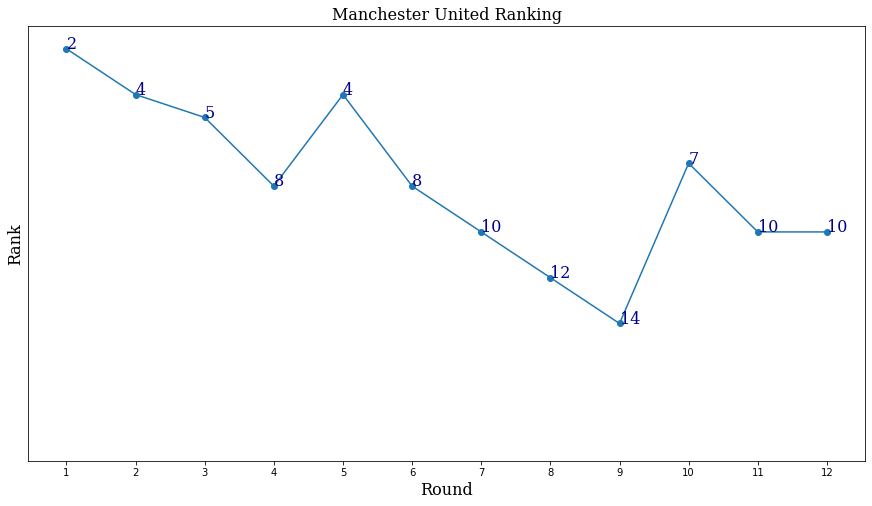

In [557]:
select_team1 = 'Manchester United'
rank_change(select_team1)

In [559]:
def teams_rank_change(*args):
    
    teams_selected = list(args)

    teams = pd.Series(results_df['Home'].unique()).sort_values()
    teams_rank = {}
    for team in teams:
        teams_rank[team] = []
        
    # set up team standings table
    team_standings_df = pd.DataFrame(columns = ['Rank','Team','Points','Win','Draw','Lose','Goals For','Goals Against','Goal Difference'])
    teams = pd.Series(results_df['Home'].unique()).sort_values()
    team_standings_df['Team'] = teams

    team_standings_df = team_standings_df.set_index('Team')

    for team in teams:
        team_standings_df.loc[team] = [0] * 8

    # Calculate rank after each round 
    this_round = 1    
    for index, row in results_df.iterrows():
        if row['Home Score'] == None:
            break
        else:
            home_team = results_df.loc[index]['Home']
            away_team = results_df.loc[index]['Away']
            current_round = results_df.loc[index]['Round']
            
            if current_round > this_round:
                for team in teams:
                    place = team_standings_df['Rank'][team]
                    teams_rank[team].append(place)
                    this_round = current_round
                
            # Goals
            team_standings_df['Goals For'][home_team] += results_df.loc[index]['Home Score']
            team_standings_df['Goals Against'][home_team] += results_df.loc[index]['Away Score']

            team_standings_df['Goals For'][away_team] += results_df.loc[index]['Away Score']
            team_standings_df['Goals Against'][away_team] += results_df.loc[index]['Home Score']


            # Points and WDL
            if row['Home Score'] > row['Away Score']:
                team_standings_df['Points'][home_team] += 3

                team_standings_df['Win'][home_team] += 1
                team_standings_df['Lose'][away_team] += 1

            elif row['Home Score'] == row['Away Score']:
                team_standings_df['Points'][home_team] += 1
                team_standings_df['Points'][away_team] += 1

                team_standings_df['Draw'][home_team] += 1
                team_standings_df['Draw'][away_team] += 1
            else:
                team_standings_df['Points'][away_team] += 3

                team_standings_df['Lose'][home_team] += 1
                team_standings_df['Win'][away_team] += 1

            team_standings_df['Goal Difference'] = team_standings_df['Goals For'] - team_standings_df['Goals Against']
            team_standings_df = team_standings_df.sort_values(by=['Points','Goal Difference','Goals For'], ascending=False)
            team_standings_df['Rank'] = range(1,21)

        
  

    
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
    font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 10,
        }
    
    plt.figure(figsize=(15,8))
    for team in teams_selected:
        
        place_list = teams_rank[team]
        x = range(1, len(place_list)+1)
        plt.scatter(x,place_list)
        plt.plot(x, place_list)
        
#         for a,b in zip(x, place_list): 
#             plt.text(a, b, str(b),fontdict = font2)

    plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
    plt.title('Selected Teams Ranking',fontdict = font)
    plt.xlabel('Round',fontdict = font)
    plt.ylabel('Rank',fontdict = font)
    plt.ylim(ymin = -1, ymax = 20) 
    plt.gca().legend(teams_selected)
    plt.gca().invert_yaxis()
    plt.xticks(x)
    plt.yticks(range(1,23))


    
    plt.show() 

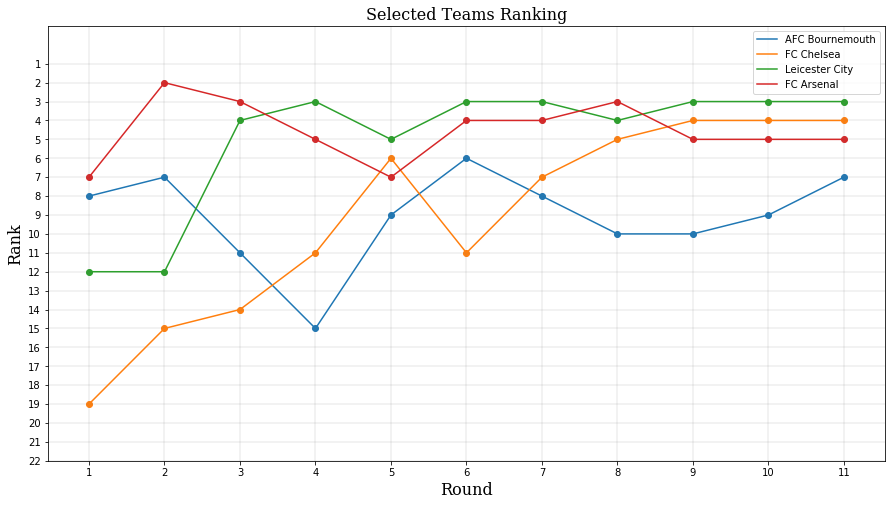

In [561]:
teams_rank_change('AFC Bournemouth','FC Chelsea','Leicester City','FC Arsenal')